### 본 매뉴얼은 BIS의 Debt service ratios 데이터를 Pandas를 이용해 전처리하는 방법에 대해 다룬다.

# BIS

- visit BIS webpage (https://www.bis.org/statistics/dsr.htm?m=6_380_671)
- download Debt service ratios (whole data set) xlsx file

DSR 엑셀파일 구조
- Quarterly Series시트 입수
- 첫 3개 행을 제외 (그 다음 첫번째 행은 컬럼으로 자동 지정)
- 첫번째 열을 인덱스로 지정

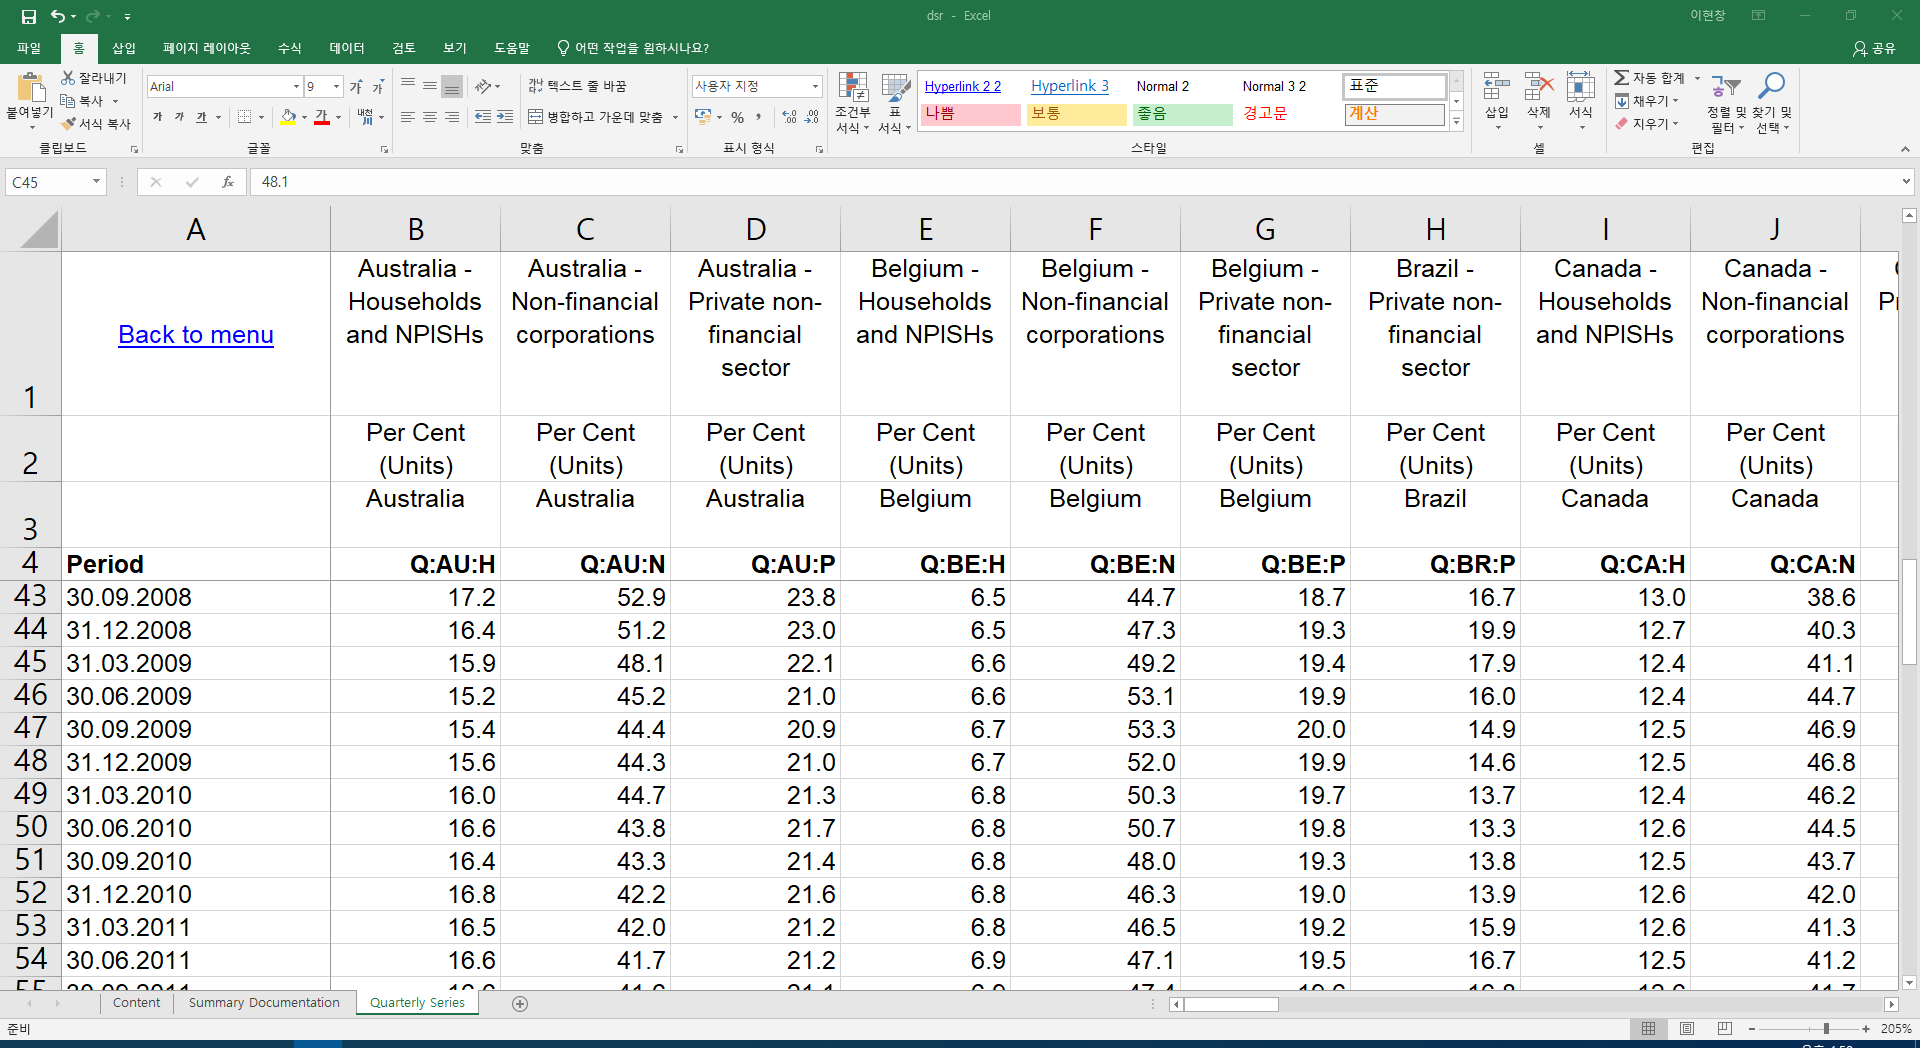

In [1]:
from IPython.display import Image
Image('img/dsr_xlsx.png', width=1000)

## 데이터 불러오기
data 폴더에 저장되어 있는 dsr.xlsx파일(위 이미지)을 pandas의 read_excel 함수를 이용해 불러온다. 필요한 데이터를 포함한 sheet이름은 Quarterly Series이며, 첫 3개 행은 불필요하므로 skiprow 인자를 이용해 제외한다. 날짜를 나타내는 첫번째 열을 index로 지정한다.
- Quarterly Series시트 입수 (sheet_name='Quarterly Series')
- 첫 3개 행을 제외 (그 다음 첫번째 행은 컬럼으로 자동 지정) (skiprows=3)
- 첫번째 열을 인덱스로 지정 (index_col=0)

In [4]:
import pandas as pd
idx = pd.IndexSlice

df = pd.read_excel('data/dsr.xlsx',
                   sheet_name='Quarterly Series', skiprows=3, index_col=0)

In [8]:
df.tail(10)

,Q:AU:H,Q:AU:N,Q:AU:P,Q:BE:H,Q:BE:N,Q:BE:P,Q:BR:P,Q:CA:H,Q:CA:N,Q:CA:P,...,Q:RU:P,Q:SE:H,Q:SE:N,Q:SE:P,Q:TH:P,Q:TR:P,Q:US:H,Q:US:N,Q:US:P,Q:ZA:P
Period,,,,,,,,,,,,,,,,,,,,,
2017-12-31,15.6,45.5,20.6,7.2,52.0,21.2,18.1,12.9,54.4,23.8,...,13.1,11.5,42.5,22.3,9.8,15.9,8.1,40.9,14.5,8.7
2018-03-31,15.7,46.3,20.8,7.2,51.0,20.8,17.9,12.8,54.6,23.6,...,12.4,11.4,44.3,22.7,9.7,16.7,8.0,40.9,14.4,8.8
2018-06-30,15.7,46.1,20.8,7.2,51.4,20.9,16.7,13.0,55.2,23.9,...,12.3,11.6,45.9,23.2,9.7,18.3,8.0,41.7,14.6,8.8
2018-09-30,15.7,46.5,20.9,7.2,51.4,20.8,16.6,13.1,53.9,23.7,...,12.2,11.5,46.7,23.3,9.7,27.4,7.9,41.6,14.6,8.9
2018-12-31,15.8,45.6,20.9,7.2,50.4,20.4,17.1,13.2,54.2,23.7,...,12.3,11.5,45.8,23.0,9.8,27.1,7.9,41.8,14.7,8.9
2019-03-31,15.7,44.6,20.8,7.2,50.8,20.4,17.5,13.2,55.8,24.1,...,12.2,11.5,47.7,23.7,9.8,21.8,7.8,42.3,14.8,9.3
2019-06-30,15.7,43.5,20.7,7.2,49.6,20.1,17.9,13.3,55.7,24.0,...,12.1,11.5,47.1,23.6,9.8,22.6,7.8,42.6,14.8,9.1
2019-09-30,15.3,42.4,20.1,7.2,49.9,20.2,17.9,13.3,56.3,24.1,...,11.9,11.5,47.8,23.8,9.8,18.0,7.8,42.7,14.9,9.2
2019-12-31,14.9,41.0,19.7,7.2,49.4,20.1,17.5,13.3,56.2,24.1,...,11.4,11.5,49.1,24.0,9.8,13.9,7.8,42.6,14.8,9.0


데이터 구조 설정

- 각 칼럼 라벨을 ':'으로 나누어 멀티인덱스로 지정 df.columns.str.split(':').tolist()
- 칼럼 첫번째 레벨은 모두 분기를 나타내는 Q이므로 제거


In [9]:
df.columns = pd.MultiIndex.from_tuples(df.columns.str.split(':').tolist())

In [10]:
df.head()

Q                                                       ...  \
              AU               BE                BR    CA              ...   
               H     N     P    H     N     P     P     H     N     P  ...   
Period                                                                 ...   
1999-03-31  10.0  44.7  16.4  6.1  37.5  13.9  40.1  10.6  56.5  21.1  ...   
1999-06-30  10.1  43.9  16.3  6.0  38.8  14.2  32.9  10.5  54.7  20.7  ...   
1999-09-30  10.3  44.6  16.5  6.0  40.8  15.0  27.2  10.5  52.6  20.3  ...   
1999-12-31  10.5  45.3  16.9  6.0  41.9  15.4  24.2  10.5  50.3  19.8  ...   
2000-03-31  10.9  46.2  17.4  6.0  42.5  15.7  19.2  10.7  50.5  20.5  ...   

                                                                    
              RU   SE                TH  TR   US                ZA  
               P    H     N     P     P   P    H     N     P     P  
Period                                                              
1999-03-31  14.8  8.9  31.6  18.3  23.3 NaN  9.4  42.3  16.0  12.1  
1999-06-30  11.4  8.9  29.3  17.0  21.0 NaN  9.5  42.6  16.2  11.9  
1999-09-30  10.0  8.9  29.8  17.2  18.8 NaN  9.6  43.3  16.5  11.3  
1999-12-31   9.1  9.0  30.2  17.6  17.2 NaN  9.7  43.9  16.7  10.7  
2000-03-31   7.6  9.0  31.6  18.4  16.3 NaN  9.8  44.7  17.0  10.0  

[5 rows x 66 columns]

첫번째 level index: data frequency

In [11]:
df.columns.get_level_values(0).unique()

Index(['Q'], dtype='object')

두번째 level index: 국가명 id

In [12]:
df.columns.get_level_values(1).unique()

Index(['AU', 'BE', 'BR', 'CA', 'CH', 'CN', 'CZ', 'DE', 'DK', 'ES', 'FI', 'FR',
       'GB', 'HK', 'HU', 'ID', 'IN', 'IT', 'JP', 'KR', 'MX', 'MY', 'NL', 'NO',
       'PL', 'PT', 'RU', 'SE', 'TH', 'TR', 'US', 'ZA'],
      dtype='object')

세번째 level index: 부문별 dsr

In [13]:
df.columns.get_level_values(2).unique()

Index(['H', 'N', 'P'], dtype='object')

모든 국가와 부문에 대해 분기별 자료이므로 아래 코드를 통해 빈도에 대한 index는 제거

In [14]:
df = df['Q']  # or df.droplevel(0, axis=1)

In [15]:
df

AU               BE                BR    CA              ...  \
               H     N     P    H     N     P     P     H     N     P  ...   
Period                                                                 ...   
1999-03-31  10.0  44.7  16.4  6.1  37.5  13.9  40.1  10.6  56.5  21.1  ...   
1999-06-30  10.1  43.9  16.3  6.0  38.8  14.2  32.9  10.5  54.7  20.7  ...   
1999-09-30  10.3  44.6  16.5  6.0  40.8  15.0  27.2  10.5  52.6  20.3  ...   
1999-12-31  10.5  45.3  16.9  6.0  41.9  15.4  24.2  10.5  50.3  19.8  ...   
2000-03-31  10.9  46.2  17.4  6.0  42.5  15.7  19.2  10.7  50.5  20.5  ...   
...          ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...   
2019-03-31  15.7  44.6  20.8  7.2  50.8  20.4  17.5  13.2  55.8  24.1  ...   
2019-06-30  15.7  43.5  20.7  7.2  49.6  20.1  17.9  13.3  55.7  24.0  ...   
2019-09-30  15.3  42.4  20.1  7.2  49.9  20.2  17.9  13.3  56.3  24.1  ...   
2019-12-31  14.9  41.0  19.7  7.2  49.4  20.1  17.5  13.3  56.2  24.1  ...   
2020-03-31  14.8  41.4  19.7  7.2  49.9  20.1  17.3  13.1  57.7  24.2  ...   

              RU    SE                TH    TR   US                ZA  
               P     H     N     P     P     P    H     N     P     P  
Period                                                                 
1999-03-31  14.8   8.9  31.6  18.3  23.3   NaN  9.4  42.3  16.0  12.1  
1999-06-30  11.4   8.9  29.3  17.0  21.0   NaN  9.5  42.6  16.2  11.9  
1999-09-30  10.0   8.9  29.8  17.2  18.8   NaN  9.6  43.3  16.5  11.3  
1999-12-31   9.1   9.0  30.2  17.6  17.2   NaN  9.7  43.9  16.7  10.7  
2000-03-31   7.6   9.0  31.6  18.4  16.3   NaN  9.8  44.7  17.0  10.0  
...          ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
2019-03-31  12.2  11.5  47.7  23.7   9.8  21.8  7.8  42.3  14.8   9.3  
2019-06-30  12.1  11.5  47.1  23.6   9.8  22.6  7.8  42.6  14.8   9.1  
2019-09-30  11.9  11.5  47.8  23.8   9.8  18.0  7.8  42.7  14.9   9.2  
2019-12-31  11.4  11.5  49.1  24.0   9.8  13.9  7.8  42.6  14.8   9.0  
2020-03-31  11.8  11.6  49.6  24.1   9.9  12.8  7.8  43.8  15.0   9.2  

[85 rows x 66 columns]

각 부문(민간, 비금융기업, 가계)에 대한 국가별 DSR 수준을 확인하기 쉽도록 칼럼 레벨 순서를 변경

- df.reorder_levels()

In [16]:
df.reorder_levels([1, 0], axis = 1)

H     N     P    H     N     P           H     N     P  ...  \
              AU    AU    AU   BE    BE    BE    BR    CA    CA    CA  ...   
Period                                                                 ...   
1999-03-31  10.0  44.7  16.4  6.1  37.5  13.9  40.1  10.6  56.5  21.1  ...   
1999-06-30  10.1  43.9  16.3  6.0  38.8  14.2  32.9  10.5  54.7  20.7  ...   
1999-09-30  10.3  44.6  16.5  6.0  40.8  15.0  27.2  10.5  52.6  20.3  ...   
1999-12-31  10.5  45.3  16.9  6.0  41.9  15.4  24.2  10.5  50.3  19.8  ...   
2000-03-31  10.9  46.2  17.4  6.0  42.5  15.7  19.2  10.7  50.5  20.5  ...   
...          ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...   
2019-03-31  15.7  44.6  20.8  7.2  50.8  20.4  17.5  13.2  55.8  24.1  ...   
2019-06-30  15.7  43.5  20.7  7.2  49.6  20.1  17.9  13.3  55.7  24.0  ...   
2019-09-30  15.3  42.4  20.1  7.2  49.9  20.2  17.9  13.3  56.3  24.1  ...   
2019-12-31  14.9  41.0  19.7  7.2  49.4  20.1  17.5  13.3  56.2  24.1  ...   
2020-03-31  14.8  41.4  19.7  7.2  49.9  20.1  17.3  13.1  57.7  24.2  ...   

                     H     N     P                H     N     P        
              RU    SE    SE    SE    TH    TR   US    US    US    ZA  
Period                                                                 
1999-03-31  14.8   8.9  31.6  18.3  23.3   NaN  9.4  42.3  16.0  12.1  
1999-06-30  11.4   8.9  29.3  17.0  21.0   NaN  9.5  42.6  16.2  11.9  
1999-09-30  10.0   8.9  29.8  17.2  18.8   NaN  9.6  43.3  16.5  11.3  
1999-12-31   9.1   9.0  30.2  17.6  17.2   NaN  9.7  43.9  16.7  10.7  
2000-03-31   7.6   9.0  31.6  18.4  16.3   NaN  9.8  44.7  17.0  10.0  
...          ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
2019-03-31  12.2  11.5  47.7  23.7   9.8  21.8  7.8  42.3  14.8   9.3  
2019-06-30  12.1  11.5  47.1  23.6   9.8  22.6  7.8  42.6  14.8   9.1  
2019-09-30  11.9  11.5  47.8  23.8   9.8  18.0  7.8  42.7  14.9   9.2  
2019-12-31  11.4  11.5  49.1  24.0   9.8  13.9  7.8  42.6  14.8   9.0  
2020-03-31  11.8  11.6  49.6  24.1   9.9  12.8  7.8  43.8  15.0   9.2  

[85 rows x 66 columns]

칼럼을 부문 - 국가 순서로 정렬 sort_index(axis=1)

In [17]:
df.reorder_levels([1, 0], axis = 1).sort_index(axis=1)

H                                                 ...     P  \
              AU   BE    CA   DE    DK   ES   FI   FR   GB   IT  ...    NL   
Period                                                           ...         
1999-03-31  10.0  6.1  10.6  9.5  17.8  6.1  4.6  4.7  8.8  3.0  ...  23.5   
1999-06-30  10.1  6.0  10.5  9.6  17.2  5.4  4.6  4.8  8.6  2.9  ...  23.7   
1999-09-30  10.3  6.0  10.5  9.6  16.7  5.4  4.6  4.8  8.6  2.9  ...  24.1   
1999-12-31  10.5  6.0  10.5  9.6  17.7  6.1  4.7  4.8  8.9  3.2  ...  24.5   
2000-03-31  10.9  6.0  10.7  9.8  17.0  5.6  4.7  4.8  9.0  3.2  ...  24.5   
...          ...  ...   ...  ...   ...  ...  ...  ...  ...  ...  ...   ...   
2019-03-31  15.7  7.2  13.2  6.1  15.0  6.2  7.1  6.3  8.9  4.3  ...  26.1   
2019-06-30  15.7  7.2  13.3  6.1  14.9  6.2  7.1  6.3  8.9  4.2  ...  26.1   
2019-09-30  15.3  7.2  13.3  6.1  14.8  6.1  7.1  6.3  9.0  4.2  ...  26.1   
2019-12-31  14.9  7.2  13.3  6.1  14.6  6.1  7.1  6.4  9.0  4.2  ...  25.9   
2020-03-31  14.8  7.2  13.1  6.1  14.4  5.9  7.2  6.4  9.0  4.2  ...  25.8   

                                                                 
              NO   PL    PT    RU    SE    TH    TR    US    ZA  
Period                                                           
1999-03-31  23.6  8.2  14.0  14.8  18.3  23.3   NaN  16.0  12.1  
1999-06-30  23.5  7.9  14.1  11.4  17.0  21.0   NaN  16.2  11.9  
1999-09-30  23.2  7.9  14.0  10.0  17.2  18.8   NaN  16.5  11.3  
1999-12-31  23.1  7.9  14.1   9.1  17.6  17.2   NaN  16.7  10.7  
2000-03-31  22.9  8.0  14.3   7.6  18.4  16.3   NaN  17.0  10.0  
...          ...  ...   ...   ...   ...   ...   ...   ...   ...  
2019-03-31  25.9  7.0  14.6  12.2  23.7   9.8  21.8  14.8   9.3  
2019-06-30  26.4  6.9  14.5  12.1  23.6   9.8  22.6  14.8   9.1  
2019-09-30  27.0  6.9  14.3  11.9  23.8   9.8  18.0  14.9   9.2  
2019-12-31  27.3  6.8  14.1  11.4  24.0   9.8  13.9  14.8   9.0  
2020-03-31  27.9  7.0  14.1  11.8  24.1   9.9  12.8  15.0   9.2  

[85 rows x 66 columns]

데이터 자료형을 확인

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 1999-03-31 to 2020-03-31
Data columns (total 66 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   (AU, H)  85 non-null     float64
 1   (AU, N)  85 non-null     float64
 2   (AU, P)  85 non-null     float64
 3   (BE, H)  85 non-null     float64
 4   (BE, N)  85 non-null     float64
 5   (BE, P)  85 non-null     float64
 6   (BR, P)  85 non-null     float64
 7   (CA, H)  85 non-null     float64
 8   (CA, N)  85 non-null     float64
 9   (CA, P)  85 non-null     float64
 10  (CH, P)  85 non-null     float64
 11  (CN, P)  85 non-null     float64
 12  (CZ, P)  85 non-null     float64
 13  (DE, H)  85 non-null     float64
 14  (DE, N)  85 non-null     float64
 15  (DE, P)  85 non-null     float64
 16  (DK, H)  85 non-null     float64
 17  (DK, N)  85 non-null     float64
 18  (DK, P)  85 non-null     float64
 19  (ES, H)  85 non-null     float64
 20  (ES, N)  85 non-null     float64
 21

In [19]:
df.tail()

AU               BE                BR    CA              ...  \
               H     N     P    H     N     P     P     H     N     P  ...   
Period                                                                 ...   
2019-03-31  15.7  44.6  20.8  7.2  50.8  20.4  17.5  13.2  55.8  24.1  ...   
2019-06-30  15.7  43.5  20.7  7.2  49.6  20.1  17.9  13.3  55.7  24.0  ...   
2019-09-30  15.3  42.4  20.1  7.2  49.9  20.2  17.9  13.3  56.3  24.1  ...   
2019-12-31  14.9  41.0  19.7  7.2  49.4  20.1  17.5  13.3  56.2  24.1  ...   
2020-03-31  14.8  41.4  19.7  7.2  49.9  20.1  17.3  13.1  57.7  24.2  ...   

              RU    SE               TH    TR   US               ZA  
               P     H     N     P    P     P    H     N     P    P  
Period                                                               
2019-03-31  12.2  11.5  47.7  23.7  9.8  21.8  7.8  42.3  14.8  9.3  
2019-06-30  12.1  11.5  47.1  23.6  9.8  22.6  7.8  42.6  14.8  9.1  
2019-09-30  11.9  11.5  47.8  23.8  9.8  18.0  7.8  42.7  14.9  9.2  
2019-12-31  11.4  11.5  49.1  24.0  9.8  13.9  7.8  42.6  14.8  9.0  
2020-03-31  11.8  11.6  49.6  24.1  9.9  12.8  7.8  43.8  15.0  9.2  

[5 rows x 66 columns]

## bok_da 라이브러의 plotter 클래스와 matplotlib 이용해 그래프 그리기

- 한국의 부문별 DSR 추이
- 한국, 미국, 영국의 가계부문 DSR 추이 (idx = pd.IndexSlice 이용)
- 2010년 이후 추이 (.loc['2010':, ])

In [20]:
df['AU'] #국가명 id를 이용해 특정 국가의 부문별 자료를 탐색

,H,N,P
Period,,,
1999-03-31,10.0,44.7,16.4
1999-06-30,10.1,43.9,16.3
1999-09-30,10.3,44.6,16.5
1999-12-31,10.5,45.3,16.9
2000-03-31,10.9,46.2,17.4
...,...,...,...
2019-03-31,15.7,44.6,20.8
2019-06-30,15.7,43.5,20.7
2019-09-30,15.3,42.4,20.1


### bok_da 라이브러리의 plotter 클래스를 이용해 시각화

- 한국의 부문별 DSR 추이

In [21]:
import bok_da as bd
from bok_da.viz import Plotter

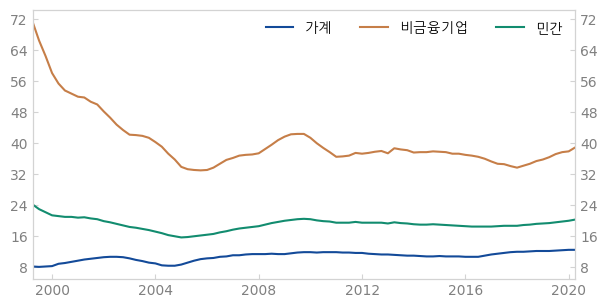

In [36]:
pp = Plotter(xmargin=0)
pp.line(df.index, (df.loc[:, idx['KR', ['H']]], '가계'), (df.loc[:, idx['KR', ['N']]], '비금융기업'), (df.loc[:, idx['KR', ['P']]], '민간'))
pp.set_xaxis('year')
pp.set_yaxis('integer')
pp.legend()

- 한국, 미국, 영국의 가계부문 DSR 추이 (idx = pd.IndexSlice 이용)

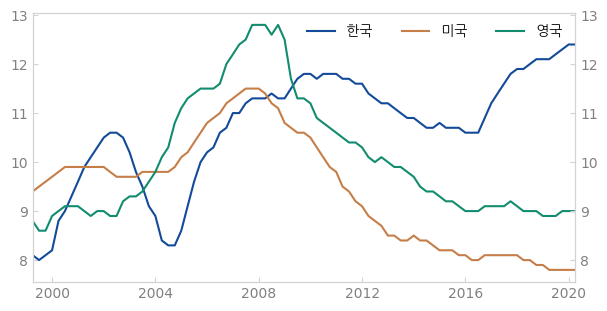

In [37]:
pp = Plotter(xmargin=0)
pp.line(df.index, (df.loc[:, idx['KR', ['H']]], '한국'), (df.loc[:, idx['US', ['H']]], '미국'), (df.loc[:, idx['GB', ['H']]], '영국'))
pp.set_xaxis('year')
pp.set_yaxis('integer')
pp.legend()

- 2010년 이후 추이 (.loc['2010':, ])

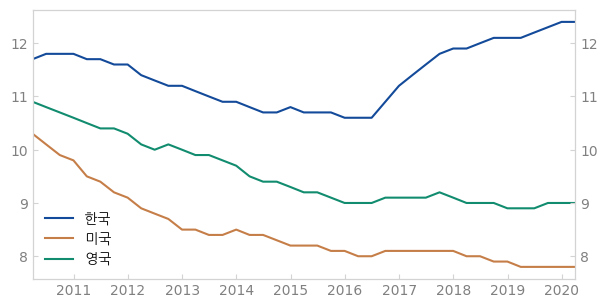

In [52]:
pp = Plotter(xmargin=0)
pp.line(df.loc['2010':].index, (df.loc['2010':, idx['KR', ['H']]], '한국'), (df.loc['2010':, idx['US', ['H']]], '미국'), (df.loc['2010':, idx['GB', ['H']]], '영국'))
pp.set_xaxis('year')
pp.set_yaxis('integer')
pp.legend(loc=3, ncol=1)

### 그래프 꾸미기
- scripts 폴더에서 RGB 값들이 리스트로 저장된 colors.py 파일 실행
    - lcolors, bcolors
- 색 지정, 범례, 그리드, 타이틀, 마커 등

In [53]:
%run scripts/colors.py

<Figure size 640x480 with 0 Axes>

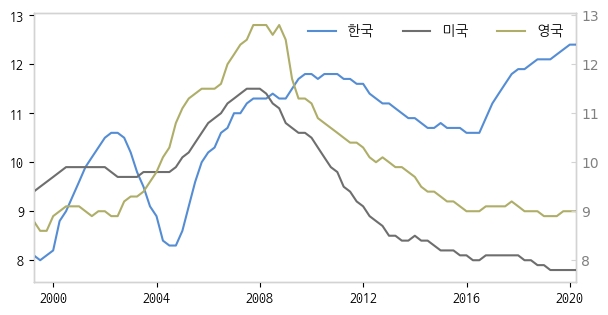

In [70]:
pp = Plotter(xmargin=0)
pp.line(df.index, (df.loc[:, idx['KR', ['H']]], '한국'), (df.loc[:, idx['US', ['H']]], '미국'), (df.loc[:, idx['GB', ['H']]], '영국'), color=lcolors[:3])
pp.set_xaxis('year')
pp.set_yaxis('integer')
pp.legend()

### matplotlib 이용한 연도별 그래프 그리기

- 평균, 연말, moving average

In [61]:
import matplotlib.pyplot as plt
import matplotlib as mpl

matplotlib의 한글 표시 및 마이너스 표시 오류 수정

In [68]:
plt.rcParams['font.family'] = 'NanumGothicCoding'
mpl.rcParams['axes.unicode_minus'] = False

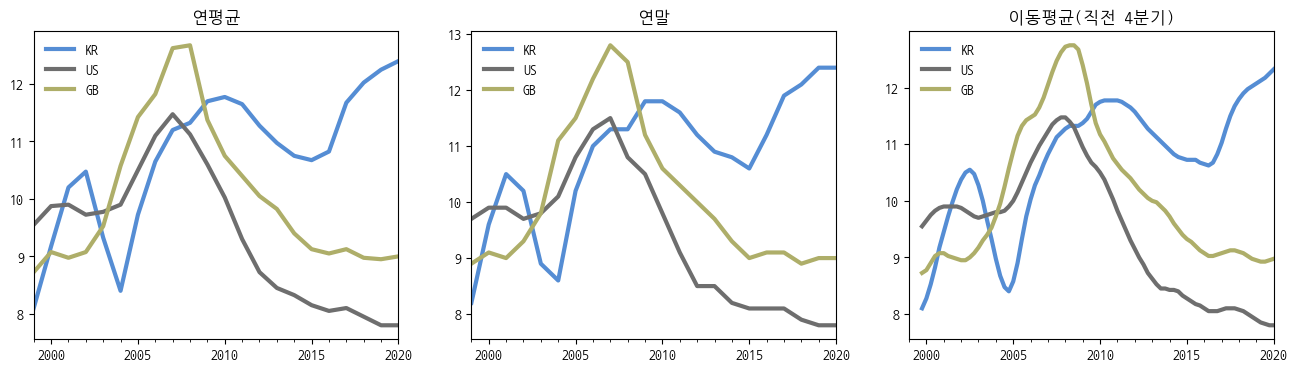

In [69]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))

df_h = df.reorder_levels([1, 0], axis = 1)['H'].loc[:, ['KR', 'US', 'GB']]
df_h.index.names = [None]

df_h.resample('A').mean().plot(ax = ax[0], lw=3, color=lcolors[:3])
df_h.resample('A').last().plot(ax = ax[1], lw=3, color=lcolors[:3])
df_h.rolling(4, center=False).mean().plot(ax = ax[2], lw=3, color=lcolors[:3])

for i, t in enumerate(['연평균', '연말', '이동평균(직전 4분기)']):
    ax[i].set_title(t)
    ax[i].legend(frameon=False)